In [26]:
#LSTM

import numpy 
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)



In [113]:
PULoc = 79

In [114]:
dataframe = pandas.read_csv('Demand_Data3_Train_CV_2017.csv', usecols=[4,3], engine='python', skipfooter=3)
dataframe = dataframe[dataframe['PULocationID'] == PULoc]
dataframe = dataframe['passenger_count']
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset = dataset[0:24*100]
dataset = np.reshape(dataset, (len(dataset),1))

In [115]:
Test = pandas.read_csv('Demand_Data3_Test_Predictions_2017.csv', usecols=[4,3], engine='python', skipfooter=3)
Test = Test[Test['PULocationID'] == 4]
Test = Test['passenger_count']
Test_Values = Test.values
Test_Values = Test_Values.astype('float32')
Test_Values = Test_Values[0:24*100]
Test_Values = np.reshape(Test_Values, (len(Test_Values),1))

In [116]:
print(max(dataset))
print(max(Test_Values))
print(type(Test_Values))

[2143.]
[295.]
<class 'numpy.ndarray'>


In [128]:
Total = numpy.append(dataset, Test_Values)
Total = numpy.append(dataset, Test_Values)


In [125]:
#Preprocessing Training
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(total)







ValueError: Expected 2D array, got 1D array instead:
array=[1076. 1096. 1071. ...   69.   65.   58.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [110]:
print(max(Test_Values))
print(max(scaler.inverse_transform(Test_Values)))

[1.]
[2143.]


In [86]:
#Training/Testing Data (Train on Jan-Oct, Ttest on Nov-Dec)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#train_size = len(dataset)
#test_size = len(Test_Values)
#train = dataset
#test = Test_Values

In [87]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [88]:

# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(1, input_shape=(1, look_back)))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=10, verbose=2)



Epoch 1/10
 - 1s - loss: 0.0279
Epoch 2/10
 - 0s - loss: 0.0161
Epoch 3/10
 - 0s - loss: 0.0122
Epoch 4/10
 - 0s - loss: 0.0081
Epoch 5/10
 - 0s - loss: 0.0052
Epoch 6/10
 - 0s - loss: 0.0041
Epoch 7/10
 - 0s - loss: 0.0039
Epoch 8/10
 - 0s - loss: 0.0038
Epoch 9/10
 - 0s - loss: 0.0038
Epoch 10/10
 - 0s - loss: 0.0038


In [89]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 #invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



Train Score: 18.11 RMSE
Test Score: 22.78 RMSE


In [90]:
print(testPredict)
print(trainPredict)

[[ 68.81325 ]
 [ 42.82191 ]
 [ 29.696606]
 [ 20.61316 ]
 [ 20.373476]
 [ 15.727598]
 [ 31.90297 ]
 [ 46.59024 ]
 [ 48.229782]
 [ 52.027725]
 [ 40.696392]
 [ 32.886665]
 [ 34.983192]
 [ 39.076023]
 [ 33.37922 ]
 [ 36.963863]
 [ 35.354023]
 [ 42.070892]
 [ 59.678665]
 [ 66.61907 ]
 [ 77.49662 ]
 [104.40173 ]
 [124.50917 ]
 [118.2559  ]
 [ 93.93374 ]
 [ 71.529106]
 [ 47.094303]
 [ 32.02583 ]
 [ 28.109255]
 [ 17.27025 ]
 [ 35.72511 ]
 [ 49.62008 ]
 [ 54.824947]
 [ 50.759583]
 [ 45.83485 ]
 [ 38.827133]
 [ 36.715893]
 [ 39.449562]
 [ 39.823334]
 [ 39.325024]
 [ 37.087894]
 [ 49.999714]
 [ 70.1058  ]
 [ 87.1382  ]
 [ 99.55962 ]
 [130.35358 ]
 [156.90161 ]
 [194.02504 ]
 [203.6343  ]
 [224.56107 ]
 [191.86601 ]
 [140.68776 ]
 [ 74.769394]
 [ 24.8294  ]
 [ 23.258604]
 [ 23.982897]
 [ 33.99556 ]
 [ 45.83485 ]
 [ 53.29796 ]
 [ 55.717003]
 [ 68.942444]
 [ 78.666794]
 [ 72.953926]
 [ 73.4724  ]
 [ 71.65857 ]
 [ 85.441475]
 [ 98.51272 ]
 [115.38453 ]
 [118.64721 ]
 [134.88446 ]
 [156.39516 ]
 [203.

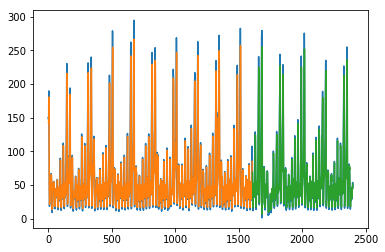

In [91]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [ ]:
#LSTM on residuals